In [1]:
import pyroot_module as pr

Welcome to JupyROOT 6.15/01
Delphes classes imported


### Importing signal and background data using the `Data` class

In [2]:
signal_path = "/home/santiago/VBF_DMSimp_spin0_EWKExcluded/Events/run_10/*.root"
background_path = "/home/santiago/VBFDM_UdeA_CMS/scripts/preliminary_study/data/background/*.root"

signal = pr.Data(signal_path, "signal")
background = pr.Data(background_path, "background")

we can see the number of events with the `number_of_events` attribute

In [3]:
ns = signal.number_of_events
nb = background.number_of_events

print "signal number of events: ",ns
print "background number of events: ",nb

signal number of events:  37670
background number of events:  342807


### Creating and filling histograms 

We can see the histograms than can be created using the `DisplayHistograms` method on some Data class instance

In [4]:
signal.DisplayHistograms()

hPT[j]: Transverse momentum
hEta[j]: jets pseudorapidity
hDeltaEta[j]: Difference on pseudorapidity between MET and jets
hDeltaPhiMetJet[j]: Difference on the azimuthal angle between the Met and jets
hDeltaPhi: Difference on the azimuthal angle between the two leading jets
hMass: Invariant mass for the two leading jets
hPTdiv: Ratio between the transverse momentum of the two leading jets
hMetET: MET transverse energy
hMetPhi: Azimuthal angle of the MET
hDeltaEtaJet: Difference on pseudorapidity between the two leading jets
hDeltaPhiMax: Difference on the azimuthal angle between the two jets with greatest invariant mass
hMassMax: Invariant mass for the jets with greatest invariant mass
hPTdivMax: Ratio between the transverse momentum of the jets with greatest invariant mass
hDeltaEtaJetMax: Difference on pseudorapidity between the jets with greatest invariant mass


We can see/change some histogram features through the `<histName>_feature` attribute, which contains the number of bins, lower and upper limits, respectively  

In [5]:
print "hMass number of bins: ",signal.hPT_feature[0]
print "hMass lower limit: ",signal.hPT_feature[1]
print "hMass upper limit: ",signal.hPT_feature[2]

hMass number of bins:  100
hMass lower limit:  0.0
hMass upper limit:  1800


Let's initialize the histograms for the signal and background data 

In [6]:
signal.Histograms()
background.Histograms()

We can fill the histograms using the `Fill()` method. By default, the method filters jets with $P_T > 30 \: \text{GeV}$ and $|\eta| < 5$. Additionally, it filters events with at least two jets in opposite hemispheres.

In [7]:
signal.Fill()
background.Fill()

ExRootAnalysisDict dictionary payload:16:10: fatal error: 'ExRootAnalysis/ExRootTreeReader.h' file not found
#include "ExRootAnalysis/ExRootTreeReader.h"
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Error in <TInterpreter::AutoParse>: Error parsing payload code for class ExRootTreeReader with content:

#line 1 "ExRootAnalysisDict dictionary payload"

#ifndef G__VECTOR_HAS_CLASS_ITERATOR
  #define G__VECTOR_HAS_CLASS_ITERATOR 1
#endif

#define _BACKWARD_BACKWARD_WARNING_H

/** \class ExRootAnalysisLinkDef
 *
 *  Lists classes to be included in cint dicitonary
 *
 *  \author P. Demin - UCL, Louvain-la-Neuve
 *
 */

#include "ExRootAnalysis/ExRootTreeReader.h"
#include "ExRootAnalysis/ExRootTreeWriter.h"
#include "ExRootAnalysis/ExRootTreeBranch.h"
#include "ExRootAnalysis/ExRootResult.h"
#include "ExRootAnalysis/ExRootUtilities.h"
#include "ExRootAnalysis/ExRootClassifier.h"
#include "ExRootAnalysis/ExRootFilter.h"

#include "ExRootAnalysis/ExRootProgressBar.h"
#include "ExRootAnalysis/E

To visualize some histogram, we can use the `PlotHistogram()` method. By default, it will create a folder named `Histograms` in the current directory and save the plot there. To change this path use the kwarg `savePath`.

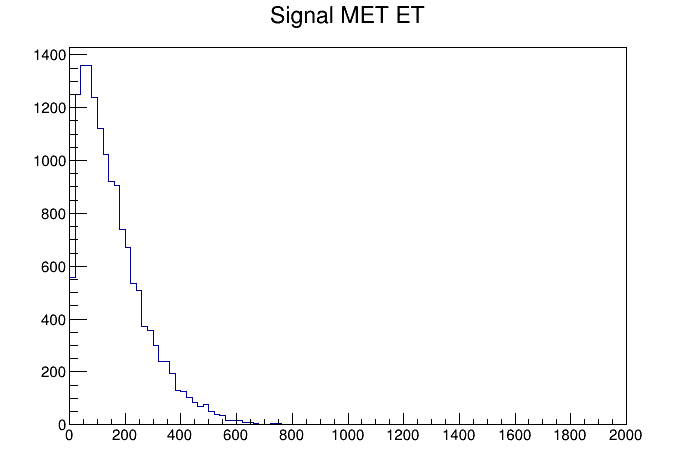

In [8]:
# plotting the MET transverse energy for the signal data
pr.PlotHisto(signal.hMetET, title="Signal MET ET", save=False)

Alternative, we can plot two histograms in the same canvas using the `PlotHistograms()` method:

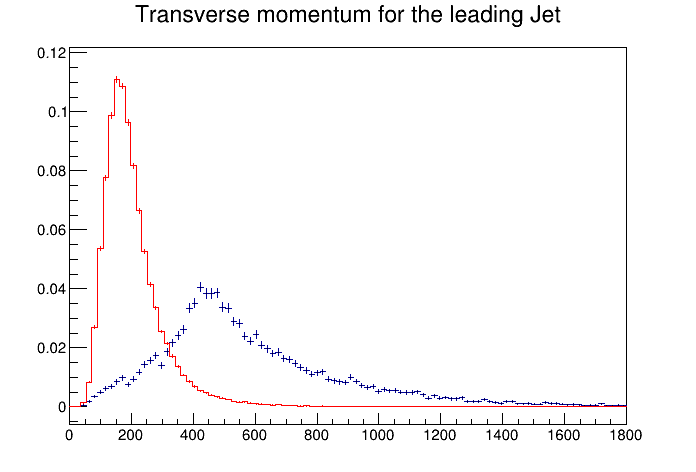

In [9]:
# plotting the tranverse momentum for the leading jets in signal and background data
hs = signal.hPT[0]
hb = background.hPT[0]

pr.PlotHistos(hs, hb, save=False, title="Transverse momentum for the leading Jet")

we can obtain a significance histogram made out of hs and hb using the `Significance` method:

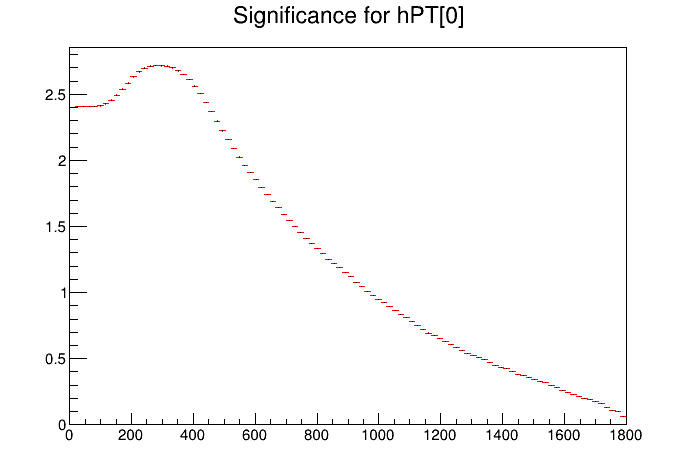

In [10]:
hz = pr.Significance(hs, hb, ns=ns, nb=nb)

pr.PlotHisto(hz, title="Significance for hPT[0]" ,save=False)

### Applying cuts

The number of events that pass some cut are store in the `cuts` attribute (there is a latex-like string of the cuts in the `cuts_keys` attribute): 

In [11]:
print "number of signal events that pass some cut (only default cuts)"
signal.cuts

number of signal events that pass some cut (only default cuts)


{'cut0': 37670L,
 'cut1': 37657,
 'cut2': 14712,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 0,
 'cut7': 0}

we can activate/deactivate an individual cut or modify its value

In [12]:
signal.Fill(h_cut=True, h_cut_value=500)
background.Fill(h_cut=True, h_cut_value=500)

In [13]:
print "number of signal events that pass some cut (with an additional cut)"
signal.cuts

number of signal events that pass some cut (with an additional cut)


{'cut0': 37670L,
 'cut1': 37657,
 'cut2': 14712,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 13821,
 'cut7': 0}

To apply all the cuts at once we can set the `apply_cut` (`False` by default) attribute to `True` before calling the `Fill` method:

In [14]:
pr.Data.apply_cut = True

signal.Fill()
background.Fill()

In [15]:
print "number of signal events that pass some cut (all cuts)"
signal.cuts

number of signal events that pass some cut (all cuts)


{'cut0': 37670L,
 'cut1': 37657,
 'cut2': 14712,
 'cut3': 885,
 'cut4': 310,
 'cut5': 18,
 'cut6': 18,
 'cut7': 0}

We can see the cutflow with the `CutFlow` method:

In [16]:
t1, t2 = pr.CutFlow(signal.cuts, background.cuts, signal.cuts_keys, ns=ns, nb=nb)

In [17]:
t1

,${\textbf{[bold]: GeV}}$,S,B,Z,Z_w
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",37670.0,342807.0,61.070492,234.415327
cut1,Number of jets $\geq$ 2,37657.0,269301.0,67.968274,258.814902
cut2,$\eta (j_1) * \eta (j_2) < 0$,14712.0,112856.0,41.190858,157.237487
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",885.0,10749.0,8.205003,31.743228
cut4,"$\mathbf{M(j_1,j_2) >}1000$",310.0,3257.0,5.190511,20.006030
cut5,$\mathbf{MET >}200$,18.0,1345.0,0.487556,1.928632
cut6,$\mathbf{H_t >}200$,18.0,1332.0,0.489898,1.937807
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",0.0,240.0,0.000000,0.000000


In [18]:
t2

,${\textbf{[bold]: GeV}}$,s_c,s_r,b_a,b_r
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",1,1,1,1
cut1,Number of jets $\geq$ 2,0.999655,0.999655,0.785576,0.785576
cut2,$\eta (j_1) * \eta (j_2) < 0$,0.39055,0.390684,0.329211,0.41907
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",0.0234935,0.060155,0.0313558,0.0952453
cut4,"$\mathbf{M(j_1,j_2) >}1000$",0.00822936,0.350282,0.00950097,0.303005
cut5,$\mathbf{MET >}200$,0.000477834,0.0580645,0.00392349,0.412957
cut6,$\mathbf{H_t >}200$,0.000477834,1,0.00388557,0.990335
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",0,0,0.000700102,0.18018
